<strong><b><font size="5">Model Diagnostics for Linear Regression in Python</font></b></strong>



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use("fivethirtyeight")
plt.rcParams['figure.figsize'] = 7,5

# from sklearn.metrics import r2_scorescore, mean_squared_error
# from sklean.linear_model import LinearRegression

# import statsmodels.api as sm
# import statsmodels.formula.api as smf
# from statsmodels.stats.outliers_influence import OLSInfluence

C:\Users\ismiguzel\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Data

In [2]:
#data = pd.read_csv("./housing.csv")
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv("./housing.csv", delim_whitespace=True, names=names)

In [3]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


# Linear Regression Model

In [4]:
predictors = ["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"]
outcome = "MEDV"

X = data[predictors]
y = data["MEDV"]

In [5]:
import statsmodels.api as sm 
from sklearn.model_selection import train_test_split

X = sm.add_constant(X)
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size = 0.8, random_state = 42)

model = sm.OLS(train_y, train_X)
model = model.fit()
print(model.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.743    
Dependent Variable: MEDV             AIC:                2416.6443
Date:               2020-11-21 18:39 BIC:                2472.6641
No. Observations:   404              Log-Likelihood:     -1194.3  
Df Model:           13               F-statistic:        90.43    
Df Residuals:       390              Prob (F-statistic): 6.21e-109
R-squared:          0.751            Scale:              22.418   
-------------------------------------------------------------------
              Coef.    Std.Err.     t     P>|t|    [0.025    0.975]
-------------------------------------------------------------------
const         30.2468    5.6768   5.3281  0.0000   19.0858  41.4077
CRIM          -0.1131    0.0348  -3.2502  0.0013   -0.1814  -0.0447
ZN             0.0301    0.0160   1.8824  0.0605   -0.0013   0.0616
INDUS          0.0404    0.0674   0.5994  0.5492   -0.0921   0.1728
CHAS  

# Model Evaluation

In [8]:
predictions = model.predict(test_X)
df_results = pd.DataFrame({'Actual': test_y, 'Predicted': predictions})
df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])

In [9]:
from sklearn.metrics import r2_score, mean_squared_error

RMSE = np.sqrt(mean_squared_error(test_y, predictions))
r2 = r2_score(test_y, predictions)
print(RMSE, r2)

4.928602182665344 0.6687594935356309


# Model Diagnostics

__LINEARITY__

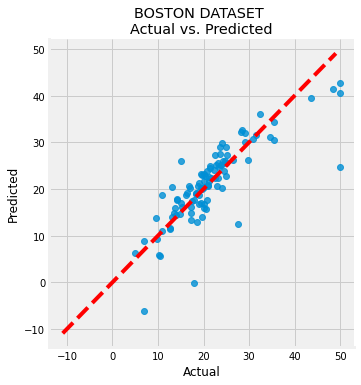

In [10]:
# Plotting the actual vs predicted values
sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False,)

# Plotting the diagonal line
d_line = np.arange(df_results.min().min(), df_results.max().max())
plt.plot(d_line, d_line, color='red', linestyle='--')
plt.title('BOSTON DATASET \nActual vs. Predicted')
#plt.savefig("Boston_linear.png")
plt.show()

__NORMALITY__

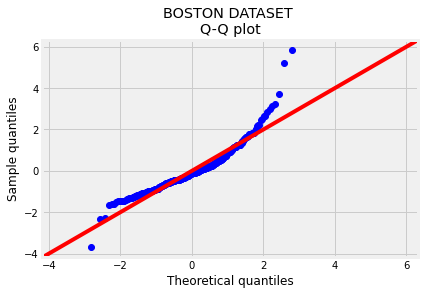

In [11]:
from statsmodels.graphics.gofplots import qqplot

qqplot(model.resid_pearson, line='45', fit='True')
plt.xlabel("Theoretical quantiles")
plt.ylabel("Sample quantiles")
plt.title("BOSTON DATASET \nQ-Q plot")
plt.savefig("Boston_normality.png")
plt.show()

__Homoscedasticity__

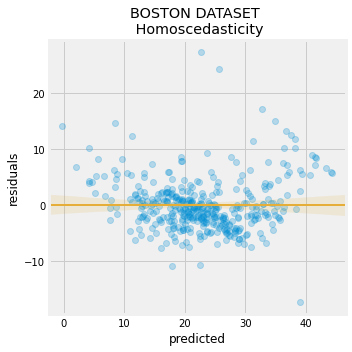

In [13]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.regplot(model.fittedvalues,model.resid, scatter_kws={'alpha': 0.25}, line_kws={'color': 'C2', 'lw': 2}, ax=ax)
ax.set_xlabel('predicted')
ax.set_ylabel('residuals')
ax.set_title("BOSTON DATASET \n Homoscedasticity")
plt.tight_layout()
plt.show()

__No Autocorrelation__

In [14]:
from statsmodels.stats.stattools import durbin_watson
durbinWatson = durbin_watson(model.resid)
print(durbinWatson)

2.1141228732155186


__No Multicollinearity__

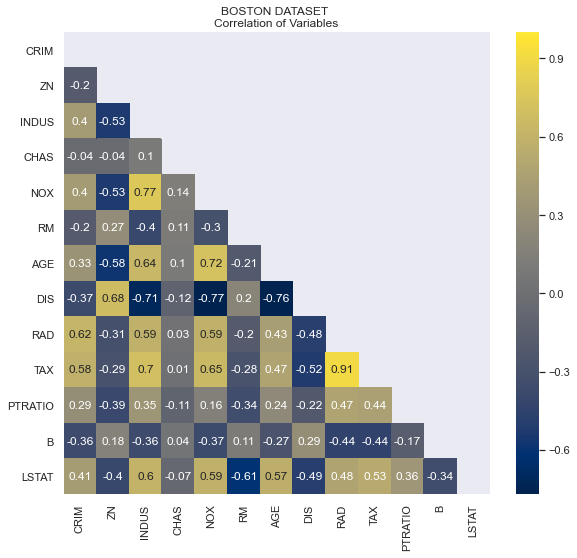

In [15]:
mask = np.zeros_like(train_X.drop("const", axis=1).corr())
mask[np.triu_indices_from(mask)] = True
sns.set(rc={'figure.figsize': (8.5,8.5)})
sns.heatmap(train_X.drop("const", axis=1).corr().round(2), annot=True, mask=mask, cmap="cividis")
plt.title("BOSTON DATASET \nCorrelation of Variables");

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

for i in range(len(X.columns)):
    v=vif(np.matrix(X),i)
    print("Variance inflation factor for {}: {}".format(X.columns[i],round(v,2)))

Variance inflation factor for const: 585.27
Variance inflation factor for CRIM: 1.79
Variance inflation factor for ZN: 2.3
Variance inflation factor for INDUS: 3.99
Variance inflation factor for CHAS: 1.07
Variance inflation factor for NOX: 4.39
Variance inflation factor for RM: 1.93
Variance inflation factor for AGE: 3.1
Variance inflation factor for DIS: 3.96
Variance inflation factor for RAD: 7.48
Variance inflation factor for TAX: 9.01
Variance inflation factor for PTRATIO: 1.8
Variance inflation factor for B: 1.35
Variance inflation factor for LSTAT: 2.94


## Bonus: Outliers

__Outlier detection using Cook's distance plot__

C:\Users\ismiguzel\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


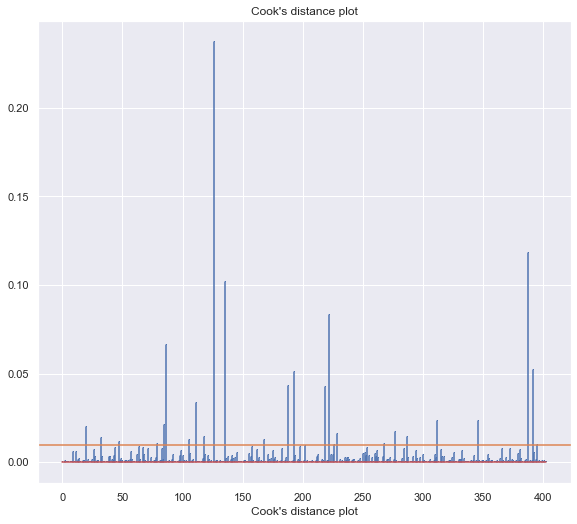

In [22]:
from statsmodels.stats.outliers_influence import OLSInfluence as influence
inf=influence(model)
(i, d) = inf.cooks_distance
plt.title("Cook's distance plot")
plt.xlabel("Cook's distance plot")
plt.stem(np.arange(len(i)), i, markerfmt=",")
plt.axhline(y=0.01, c="C1")#, line_kws={'color': 'C2', 'lw': 2},

plt.show()

# BONUS: Influence Plots

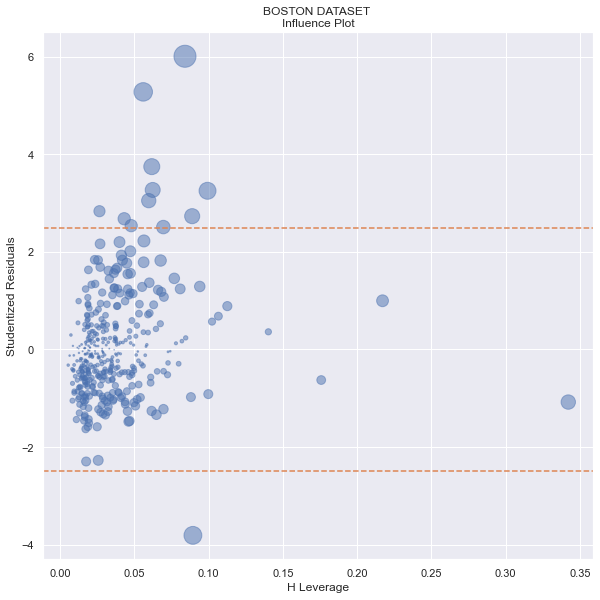

In [19]:
from statsmodels.stats.outliers_influence import OLSInfluence 
influence = OLSInfluence(model)
fig, ax = plt.subplots()
ax.axhline(-2.5, linestyle='--', color='C1')
ax.axhline(2.5, linestyle='--', color='C1')
ax.scatter(influence.hat_matrix_diag, influence.resid_studentized_internal, 
           s=1000 * np.sqrt(influence.cooks_distance[0]),
           alpha=0.5)
ax.set_xlabel('H Leverage')
ax.set_ylabel('Studentized Residuals')
ax.set_title("BOSTON DATASET \nInfluence Plot")
plt.tight_layout()
plt.show()

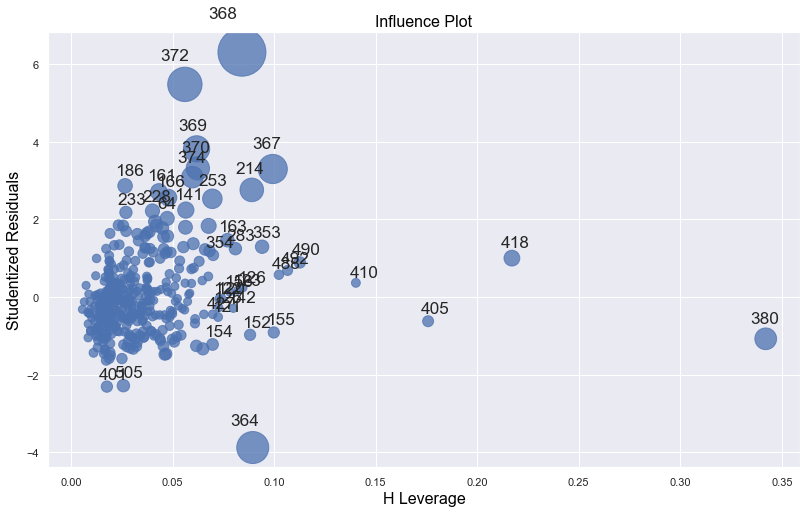

In [20]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(model, ax=ax, criterion="cooks")